In [1]:
# import libraries
from pathlib import Path
import sys
import pandas as pd
from tqdm.notebook import tqdm
from joblib import Parallel, delayed
from copy import copy
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import hashlib
import numpy as np

# import project libraries
project_path = Path('/home/ec2-user/SageMaker/david/tdm-sentiment/')
sys.path.append(str(project_path / 'src'))
#from get_sentiment.salience_index.salience_index import SalienceScorer
#from get_data.tdm_parser.tdm_parser import TdmXmlParser
# handle path
data_path = project_path / 'data/'
#corpus_name = 'ChicagoTribune'#'short_sample'  #TODO  # 'USATodayDavid' ChicagoTribune' 'Newyork20042023' TheWashingtonPostDavid, LosAngelesTimesDavid, StartupSentiment
#folder_path = data_path / 'processed/results/' / corpus_name / 'chunk_11_data.csv'
#corpus_path = Path(f'/home/ec2-user/SageMaker/data/{corpus_name}/')
#df = pd.read_csv(folder_path)
#df.shape


In [3]:
save_folder_path = data_path / 'processed/results/' / 'short_sample' / 'c_11_data.csv'
#df1 = df[0:100]
#df1.to_csv(save_folder_path, index=False)

df2 = pd.read_csv(save_folder_path)
df2 = df2[0:5]#['tf_idf_tags']
df2.head(4)

,goid,publisher,date,article_type,section,tdm_topic_tags,page,word_count,title,paragrph_text,company_name,is_economic,bert_sentiment,title_sentiment,tf_idf_tags,language
0,418445702,Chicago Tribune,1998-01-16,News,BUSINESS,NaN,2,196,GUILTY PLEA ENTERED IN INSIDER CASE,"['ibm and lotus.', 'a relative of an internati...",NaN,1,-0.942768,-0.919513,"['cassano', 'lotus', 'ibm', 'mazzone', 'worker...",English
1,822054949,Chicago Tribune,2011-01-04,Commentary,News,Hard disks,16,746,A struggle to connect with laptop's insurance ...,"['for sidney coleman, his computer is his life...",NEW Customer Service Cos Inc,1,-0.729361,-0.999462,"['coleman', 'computer', 'breneman', 'micro', '...",English
2,418623347,Chicago Tribune,1998-04-03,News,METRO DU PAGE,Sex crimes,1,587,SEXUAL ALLEGATIONS CATCH UP TO DOCTOR FONDLING...,"[""for years, dr. luis d'avis has been shadowed...",NaN,1,-0.866906,-0.862567,"['avis', 'patient', 'dupage', 'fondled', 'brea...",English
3,420243443,Chicago Tribune,2005-06-27,News,Business,Lending,1,670,Modest gains for smallest of loans ; Banks ste...,['microlending programs to start-up businesses...,NaN,1,-0.029077,0.997785,"['accion', 'loans', 'microlenders', 'microloan...",English


In [6]:
def get_article_text(corpus_path, goid_number):
    """
    Given a corpus path and a GOID, parse the corresponding XML
    and return the article text.
    """
    path = Path(corpus_path) / f"{goid_number}.xml"
    soup = parser.get_xml_soup(path)
    texts = parser.get_art_text(soup)
    return texts

def get_all_csv_files(folder_path):
    # Use Path to find all CSV files in the folder
    csv_files = list(Path(folder_path).glob('*.csv'))
    return csv_files



def concat_csv_files(folder_path):
    # Get a list of all CSV files in the folder
    csv_files = get_all_csv_files(folder_path)
    
    # Initialize an empty list to store DataFrames
    df_list = []
    
    # Loop through the list of CSV files
    for file in csv_files:
        # Read each CSV file into a DataFrame
        df = pd.read_csv(file)
        
        #goids = df['GOID'].to_list()
        #results = Parallel(n_jobs=-1)(
            #delayed(get_article_text)(corpus_path, goid) for goid in goids
        #)
        #df['Texts'] = results
        
        # Append the DataFrame to the list
        df_list.append(df)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df


def md5_hash_text(text):
    # If 'text' is a list, join its items into a single string.
    if isinstance(text, list):
        # Convert each item to string (in case they're not),
        # then join them with a space (or any delimiter you want).
        text = " ".join(map(str, text))
    
    return hashlib.md5(text.encode('utf-8')).hexdigest()


def get_text_string(text):
    text = " ".join(map(str, text))
    return text

In [7]:
combined_df = concat_csv_files(folder_path)
combined_df.head()

,goid,publisher,date,article_type,section,tdm_topic_tags,page,word_count,title,paragrph_text,company_name,is_economic,bert_sentiment,tf_idf_tags,title_sentiment
0,432655158,New York Times,2004-01-22,News,C,Bank earnings,C.5,533,Profits Rose At 3 Big Banks In 4th Quarter,"['j.p. morgan chase & company, the bank of new...",J P Morgan Chase & Co,1,-0.119698,NaN,NaN
1,433827528,New York Times,2008-04-14,News,C,Search engines,C.6,905,Beaming Online Services Toward Blacks,['correction: an article on monday about an ia...,Google Inc,1,0.055897,NaN,NaN
2,433287781,New York Times,2006-02-12,News,3,NaN,3.2,119,"Moderation, of a Sort","[""hovnanian enterprises, the big family-contro...",NaN,1,-0.928506,NaN,NaN
3,434279886,New York Times,2010-01-07,News,B,Diodes,B.8,221,Another Compact Camera Offers Changeable Lenses,['samsung has announced its first camera with ...,NaN,1,-0.473586,NaN,NaN
4,1841695906,New York Times,2016-11-21,News,A,NaN,A.20,128,The Old Ways Are Sometimes the Only Ways,"['dear diary,', 'on a crisp, sunny, fall satur...",NaN,1,0.014916,NaN,NaN


In [4]:
# Initialize scorer and parser objects
scorer = SalienceScorer()
parser = TdmXmlParser()

# Combine CSV files from all files
combined_df = concat_csv_files(folder_path)

# Combine 'International Herald Tribune' and 'New York Times' into one category
combined_df['Publisher'] = combined_df['Publisher'].replace(
    {'international herald tribune': 'new york times',
     'new york times the': 'new york times',
     'international new york times': 'new york times',
     'los angeles times (pre-1997 fulltext)': 'los angeles times',
     'washington post (pre-1997 fulltext) the': 'washington post the' }
)
combined_df = combined_df[combined_df['Publisher'] != 'new york times español']
combined_df = combined_df[combined_df[['bert_sentiment', 'Page']].notna().all(axis=1)]
combined_df = combined_df.drop_duplicates(subset=['GOID'])
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df = combined_df[combined_df['Date'].dt.year < 2024]
combined_df["text_hash"] = combined_df["Texts"].apply(md5_hash_text)
combined_df.drop_duplicates(subset=["text_hash"], inplace=True)
#combined_df.to_csv("ChicagoTribuneWithText.csv")
#combined_df.shape
combined_df.head()

KeyError: 'Texts'

In [ ]:
#print(help(Path()))
path = Path.cwd()
combined_df = pd.read_csv(path / f'{corpus_name}WithText.csv')
combined_df['Texts'] = combined_df['Texts'].apply(ast.literal_eval)
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df = combined_df[combined_df['Date'].dt.year < 2024]
combined_df.head()
#combined_df.shape


In [4]:
df = combined_df.copy()
df['Texts'] = df['Texts'].apply(get_text_string)
df['Year'] = df['Date'].dt.year
publisher = df['Publisher'][0]

dataframes = []
threshold_list = [0, 300, 1000]
for i in range(len(threshold_list)): 
    sub_df = df[df['WordCount'] > threshold_list[i]].reset_index()
    sub_df = sub_df.groupby(['Publisher', 'Year']).size().reset_index(name='Count')
    dataframes.append(sub_df)
    print(f'sub_df_{i} shape is: {sub_df.shape}')


sub_df_0 shape is: (29, 3)
sub_df_1 shape is: (29, 3)
sub_df_2 shape is: (29, 3)


### plot number of articles per year

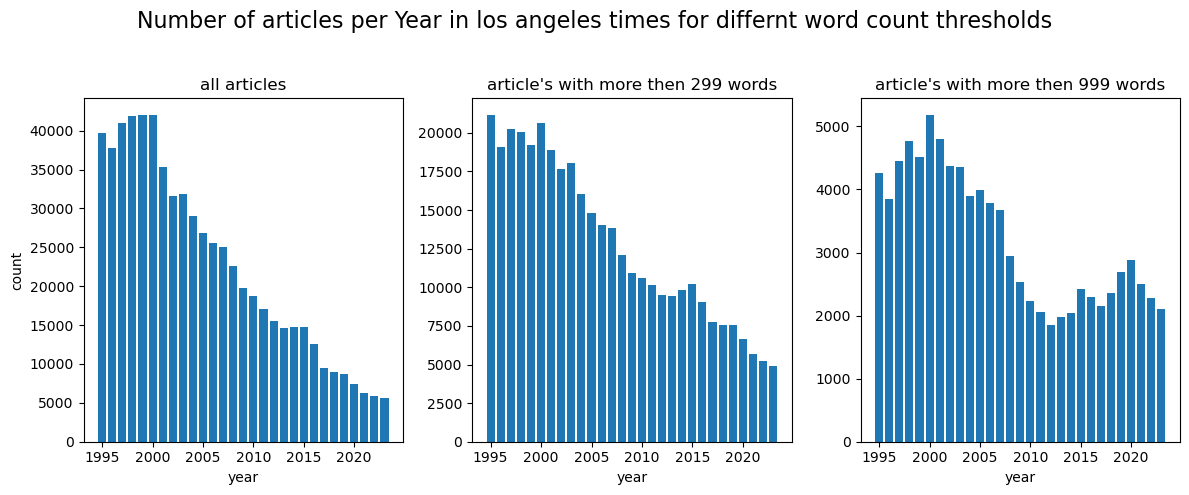

In [5]:
df0, df1, df2 = dataframes[0], dataframes[1], dataframes[2], 
years = df0['Year']
values1 = df0['Count']
values2 = df1['Count']
values3 = df2['Count']

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot the first bar chart
axes[0].bar(years, values1)
axes[0].set_title('all articles')
axes[0].set_ylabel('count')
axes[0].set_xlabel('year')

# Plot the second bar chart
axes[1].bar(years, values2)
axes[1].set_title(f"article's with more then {threshold_list[1] - 1} words" )
axes[1].set_xlabel('year')

# Plot the third bar chart
axes[2].bar(years, values3)
axes[2].set_title(f"article's with more then {threshold_list[2] - 1} words")
axes[2].set_xlabel('year')

# Add a main title
plt.suptitle(f"Number of articles per Year in {publisher} for differnt word count thresholds", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title

# Show the plot
plt.show()

